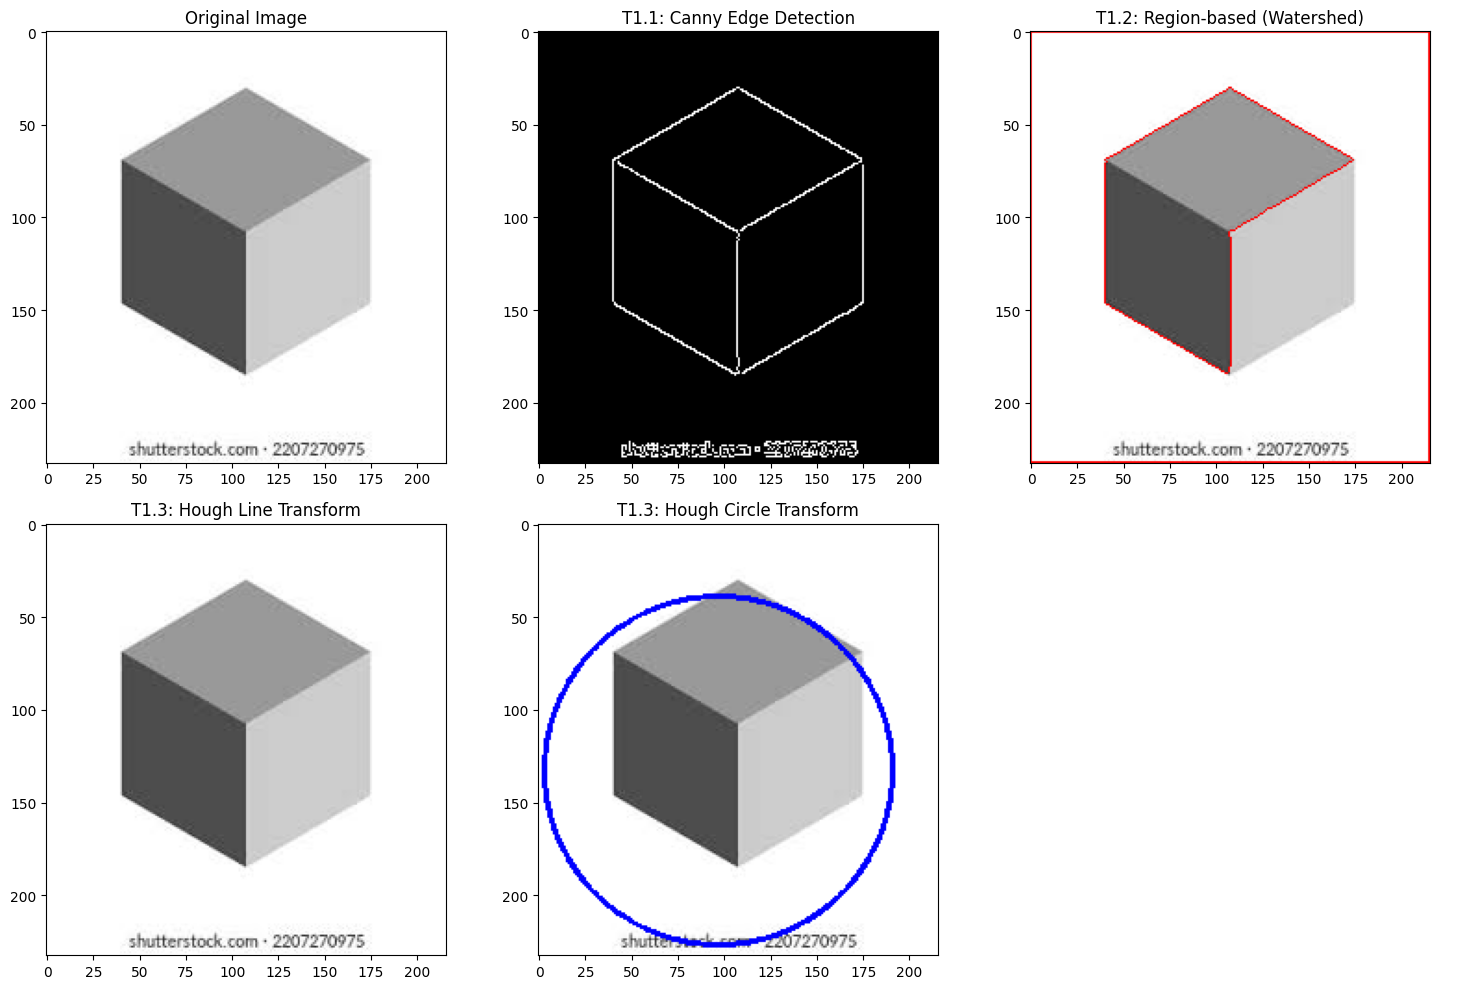

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Image
image = cv2.imread('/content/download.jpeg', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ---------------------- T1.1: Edge-based Segmentation ----------------------
edges = cv2.Canny(gray, 100, 200)

# ---------------------- T1.2: Region-based Segmentation ----------------------
# Convert image to grayscale and apply threshold
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Morphological Transformations to remove noise
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Distance Transform to find sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

# Find unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker Labelling for Watershed Algorithm
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply Watershed
image_copy = image.copy()
cv2.watershed(image_copy, markers)
image_copy[markers == -1] = [0, 0, 255]  # Mark boundaries in red

# ---------------------- T1.3: Hough Transform ----------------------
# Hough Line Transform
edges_hough = cv2.Canny(gray, 50, 150)
lines = cv2.HoughLinesP(edges_hough, 1, np.pi/180, threshold=100, minLineLength=50, maxLineGap=10)

line_img = image.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Hough Circle Transform
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=30, minRadius=5, maxRadius=100)

circle_img = image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(circle_img, (i[0], i[1]), i[2], (255, 0, 0), 2)

# ---------------------- Plot Results ----------------------
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0, 0].set_title("Original Image")

ax[0, 1].imshow(edges, cmap='gray')
ax[0, 1].set_title("T1.1: Canny Edge Detection")

ax[0, 2].imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
ax[0, 2].set_title("T1.2: Region-based (Watershed)")

ax[1, 0].imshow(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
ax[1, 0].set_title("T1.3: Hough Line Transform")

ax[1, 1].imshow(cv2.cvtColor(circle_img, cv2.COLOR_BGR2RGB))
ax[1, 1].set_title("T1.3: Hough Circle Transform")

ax[1, 2].axis("off")

plt.tight_layout()
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

100%|██████████| 6.25M/6.25M [00:00<00:00, 19.8MB/s]


WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.11/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 384.2ms
image 2/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/zidane.jpg: 384x640 2 persons, 1 tie, 162.6ms
Speed: 10.8ms preprocess, 273.4ms inference, 19.9ms postprocess per image at shape (1, 3, 384, 640)


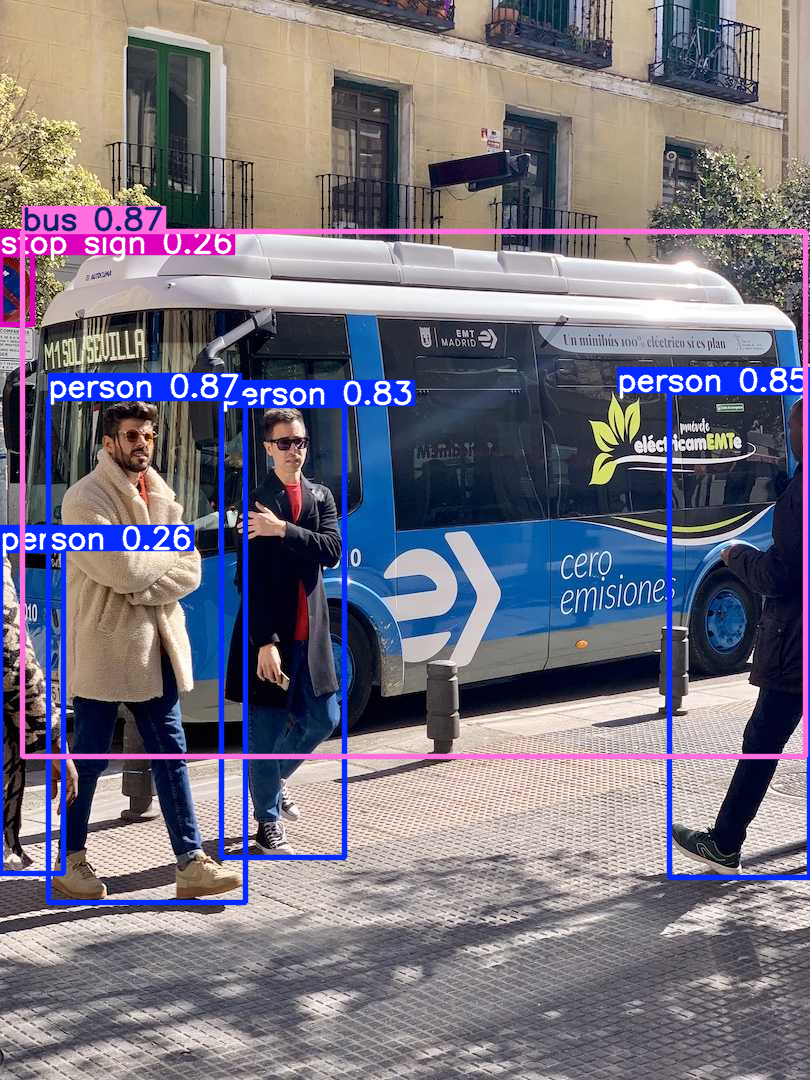

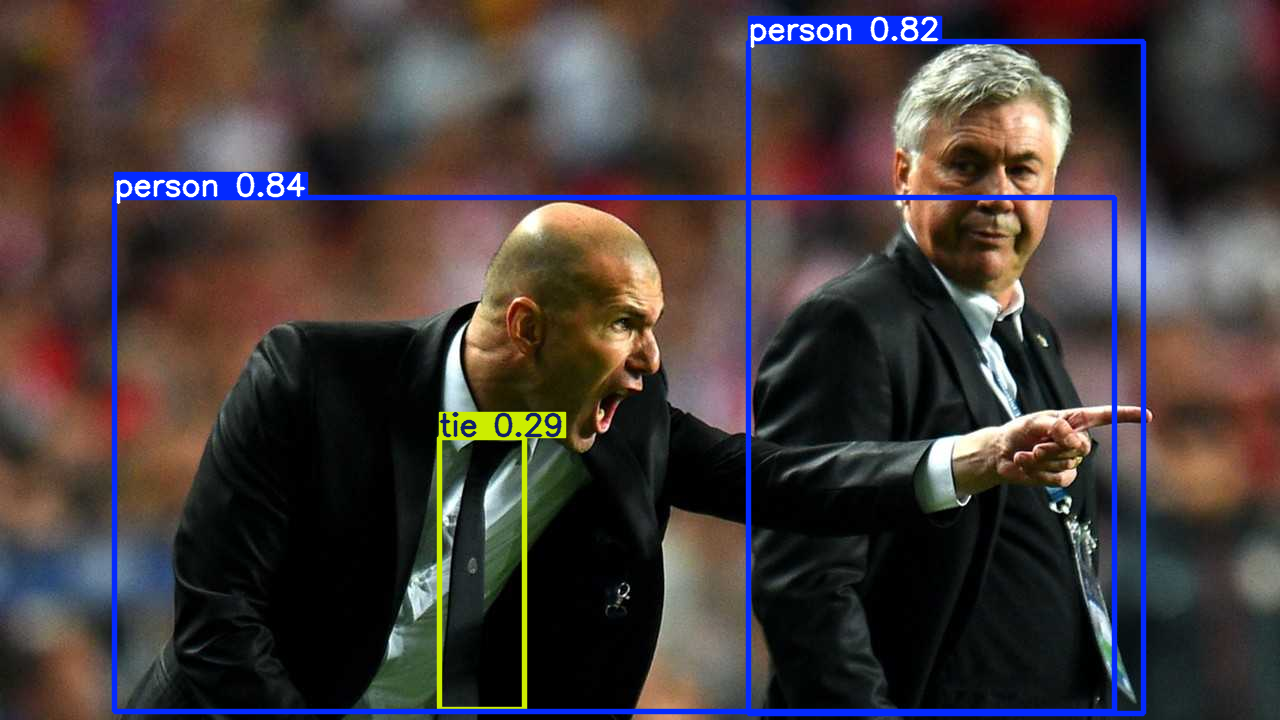

100%|██████████| 26.4M/26.4M [00:02<00:00, 8.85MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 140kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 2.64MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 10.3MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Epoch 1, Loss: 0.5715896487236023
Epoch 2, Loss: 0.3215106725692749
Epoch 3, Loss: 0.21672657132148743
Epoch 4, Loss: 0.34444648027420044
Epoch 5, Loss: 0.259770005941391
Test Accuracy: 89.57%


In [5]:
!pip install ultralytics

import cv2
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load Pretrained YOLOv8 Model
model = YOLO("yolov8n.pt")  # Smallest YOLO model

# Load Image
image_path = "sample_image.jpg"
image = cv2.imread(image_path)

# Perform Object Detection
results = model(image)

# Display the Results
for result in results:
    result.show()  # Show image with bounding boxes
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Load Fashion-MNIST Dataset
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Define CNN for Object Classification
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 14 * 14, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1, 32 * 14 * 14)
        x = self.fc1(x)
        return x

# Initialize Model
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the Model
for epoch in range(5):
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

# Test the Model
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")
